# OpenCV 시작하기
#### 1. 이미지를 구성하는 세 가지 요소 : 이미지 크기, 정밀도, 채널
#### 2. 관심 영역, 관심 채널

## 1. 이미지 크기
* 이미지 크기는 필드나 변수에 할당될 이미지의 너비와 높이를 의미.


* 이미지는 행렬(matrix)의 행태로 구성.


* 이미지의 크기는 데이터의 크기라 볼 수 있다 -> 데이터의 개수를 줄이는 가장 보편적이며 간단한 방법은 이미지의 크기를 줄이는 것.

#### 1-1) 이미지 크기 속성
* 변수나 필드에 설정된 이미지 크기 속성 값이 액자의 역할을 함.


* 액자에 이미지를 변형하지 않고 그대로 삽입할 경우 이미지가 잘려나가는 등의 오류가 발생.

#### 1-2) OpenCV에서 이미지의 크기를 표현하는 방법
* 이미지 크기를 표현하는 방식
    1. 너비와 높이
    2. 행과 열
    * 너비와 열은 같은 값을 가지며 높이는 행과 같은 값을 갖는다.

#### 1-3) Python OpenCV에서의 이미지 크기 표현

In [32]:
import numpy as np
height= 4
width = 3
rows = 2
cols = 1
color = np.zeros((height, width, 3), np.uint8)
gray = np.zeros((rows, cols, 1), np.uint8)

* 이미지의 크기를 설정한다는 것은 동일하지만 매개변수의 순서가 다름.

## 2. 정밀도
* 정밀도란 이미지가 얼마나 많은 색상을 표현할 수 있느냐를 의미.


* 정밀도가 높을 수록 많은 색상을 표현할 수 있어 데이터의 폭이 넓어지고 더 자연스러운 이미지로 표시.


* 반대로 정밀도가 낮을수록 육안으로 확인하기 힘들 정도로 이미지의 변형이 가해지며 데이터의 개수가 줄어듦.

#### 2-1) 비트 표현
* 비트(bit)는 색상의 표현 개수를 설정.


* 색상을 표현할 때는 n-Bit로 표현하며 n은 비트의 수를 의미. 이 때 n은 2^n을 나타냄.


* 8비트 정밀도를 사용할 때 흑백 색상을 원활하게 표현할 수 있으며, 주로 **그레이스케일(Grayscale)** 메서드에 많이 사용
##### * 그레이스케일 (Grayscale): 흰색부터 검은색까지 점차적으로 변해가는 것. 일련의 공식을 적용해 색상 이미지를 흑백 이미지로 변환한다.

#### 2-2) OpenCV 정밀도 표현법

In [28]:
import pandas as pd

type1 = {
    'OpenCV_type' : ['np.uint8','np.int8','np.uint16','np.int16','np.float32','np.double'],
    'data_type' : ['byte','sbyte','uint16','int16','float','double']
}

pd.DataFrame(type1)

,OpenCV_type,data_type
0,np.uint8,byte
1,np.int8,sbyte
2,np.uint16,uint16
3,np.int16,int16
4,np.float32,float
5,np.double,double


#### 2-3) Python OpenCV에서의 정밀도 표현

In [35]:
color = np.zeros((height, width, 3), np.uint8)
gray = np.zeros((rows, cols, 1), np.uint8)

* color 변수는 색상 이미지를 의미하며, gray 변수는 그레이스케일 이미지를 의미.


* 두 이미지 모두 np.uint8을 사용하며 0~255의 범위로 색상을 표현.

## 3. 채널
* 채널은 그래픽스 이미지의 색상 정보를 담고 있음.


* 일반적으로 Red, Green, Blue와 추가로 Alpha로 구성. 이 밖에도 Hue, Saturation, Value등의 채널도 존재.


* 색상을 표시할 떄는 주로 3~4 채널의 값을 사용하고 흑백 이미지를 표현할 때는 1채널을 사용.

#### 3-1) 색상 표현
* 색상 이미지(RGB)에서 Red 값만 추출한다고 해서 추출된 이미지가 빨간색으로 표현되지 않음.


* 해당 성분에 가까울수록 흰색으로 출력되고 해당 성분과 가깝지 않은 값은 검은색으로 출력.


* 어떤 채널을 사용하고 몇 개의 챛널을 사용할지 여부가 알고리즘과 연산량에 큰 영향을 미침.

#### 3-2) OpenCV 채널 표현법
* Python OpenCV에서 채널을 표현할 때는 (row, column, 채널 수)로 나타냄.

In [36]:
color = np.zeros((height, width, 3), np.uint8)
gray = np.zeros((rows, cols, 1), np.uint8)

* 채널 수가 색상 표현 방식을 결정.

#### 3-3) 단일 채널을 사용하는 이유
* 흑백이나 특정 색상 데이터를 다중 채널로 사용한다면 동일한 값이 3회 반복되어 불필요한 데이터가 할당돼 연산량 증가와 정확도 감소를 초래


* 데이터의 양을 줄이고 정확도를 높이기 위해 입력 이미지를 변환해 단일 채널로 계산을 진행.

## 4. 관심영역
* 관심 영역이란 이미지 상에서 관심 있는 영역을 의미.


* ROI(Region of Interest)로 불림.


* 이미지에서 시계를 찾아 현재 시간을 확인하는 알고리즘을 구성

    1. 시계라는 객체 검출.
    2. 시계를 관심영역으로 설정.
    3. 관심 영역 안에서 현재 시간을 검출.


* 관심 영역을 설정하면 연산량이 줄고 정확도가 높아져 알고리즘의 효율성이 높아짐.

## 5. 관심 채널
* 관심 채널이란 이미지 상에서 관심 있는 채널을 의미.


* COI(Channel of Interest)로 불림.


* 채널을 분리해서 특정 채널에 대해 연산을 수행하면 산술적으로 데이터의 양이 1/3로 줄어듦.


* 또한, 채널을 모두 분리한 뒤 동일한 알고리즘을 적용해 더 많은 결과를 얻을 수 있음.


* 계산하는 데이터의 양은 1/3로 줄지만 반환되는 데이터 양은 3배로 늘어남.

## 6. 히스토그램
* 이미지에서 사용하는 히스토그램은 X축을 픽셀 값으로 사용하고 Y축을 해당 픽셀 개수로 표현.


* 일반적으로 그레이스케일 이미지는 0 ~ 255의 픽셀값을 가짐.


* 히스토그램을 사용하면 글레이스케일 이미지의 색상 값 빈도수, 입력 이미지의 밝은 픽셀과 어두운 픽셀이 어떤 형태로 분포하는지를 알 수 있음.


* 색상 이미지의 색 분포나 객체 주변의 픽셀 분포 등 다양한 형태로 표현하고 해석하는데 활용.


* 히스토그램 중요 요소
    1. 빈도 수(BINS) : 히스토그램 그래프의 X축 간격
        * 픽셀값의 범위는 0 ~ 255로 총 256개의 범위를 가지고 있으며, 빈도 수의 값이 8이라면 0 ~ 7, 8 ~ 15, ... 총 32개의 막대가 생성.
            
    2. 차원 수(DIMS) : 히스토그램을 분석할 이미지의 차원
        * 그레이스케일은 단일 채널이므로 하나의 차원에 대해 분석할 수 있고 색상 이미지는 다중 채널이므로 세 개 이상의 차원에 대해 분석할 수 있음.
                
    3. 범위(RANGE) : 히스토그램 그래프의 X축 범위
        * 이미지에서 측정하려는 픽셀값의 범위로서, 특정 픽셀값 영역에 대해서만 분석하게 함.
        
#### 6-1) Python OpenCV에서의 히스토그램 예시

In [ ]:
import cv2
import numpy as np
import os

image = cv2.imread('C:\\Users\\dbswj\\study\\sunset\\image.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
result = np.zeros((image.shape[0], 256), dtype = np.uint8)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

for x, y in enumerate(hist):
    cv2.line(result, (x, int(np.float32(image.shape[0]))),(x, int(np.float32(image.shape[0]-y))), 255)
    
dst = np.hstack([image[:,:,0], result])
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

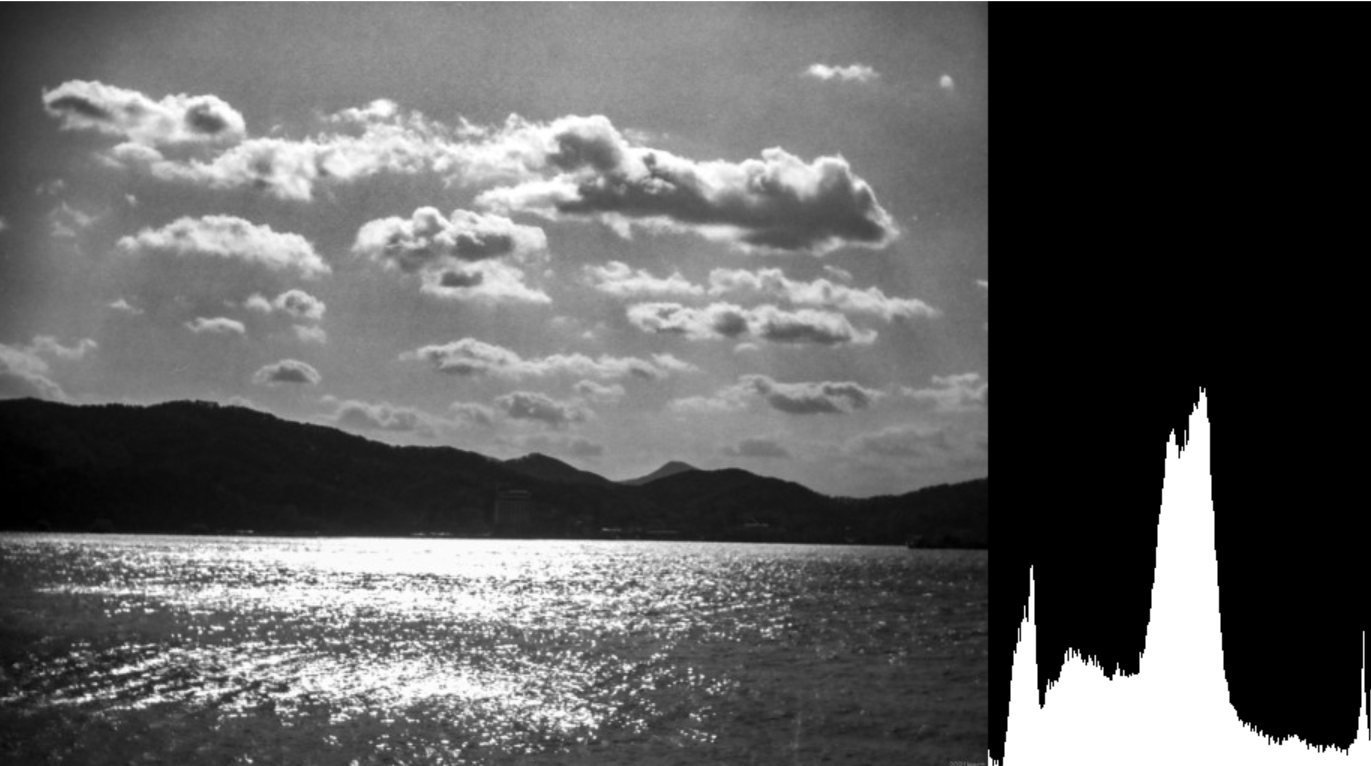

#### 6-2) Python OpenCV의 히스토그램 계산 함수
* 히스토그램 계산 함수는 입력 이미지(images)의 특정 채널(channels)에 대해 히스토그램을 계산.

In [ ]:
hist = cv2.calcHist(images, channels, mask, histSize, ranges, hist = None, accumulat = False)

* channels : 히스토그램의 X축.


* mask : 이미지를 분석할 영역을 따로 설정.


* histSize : 빈도 수(BINS)를 설정, 히스토그램 크기 설정.


* ranges : 범위(RANGES)를 설정.


* accumulate : 히스토그램이 누적해 반영할지를 설정.


* hist = None : 결과 저장. 하지만 Python OpenCV에서는 함수의 결과를 반환값응로 받아 사용할 수 있으므로 사용 X.